In [36]:
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("/Users/basileroth/Desktop/Code/offseason_greenlobby/")

from offseason_greenlobby.config import gp_loa_senat,color_17
from offseason_greenlobby.config import gp_agec_senat,color_15
from offseason_greenlobby.config import gp_lv_senat,color_16

# AGEC


Assemblée Nationale : 
10.62124248496994 % (53/499) des amendements déposés à l'AN sur l'article 10 de la Loi AGEC reprennent l'EDL [Ne pas interdire les bouteilles en plastique.].

Sénat : 
3.875968992248062 % (5/129) des amendements déposés au Sénat sur l'article 10 de la Loi AGEC reprennent l'EDL [Ne pas interdire les bouteilles en plastique.].

Sénat + Assemblée Nationale : 
9.235668789808917 % (58/628) des amendements déposés au Sénat + AN sur l'article 10 de la Loi AGEC reprennent l'EDL [Ne pas interdire les bouteilles en plastique.].


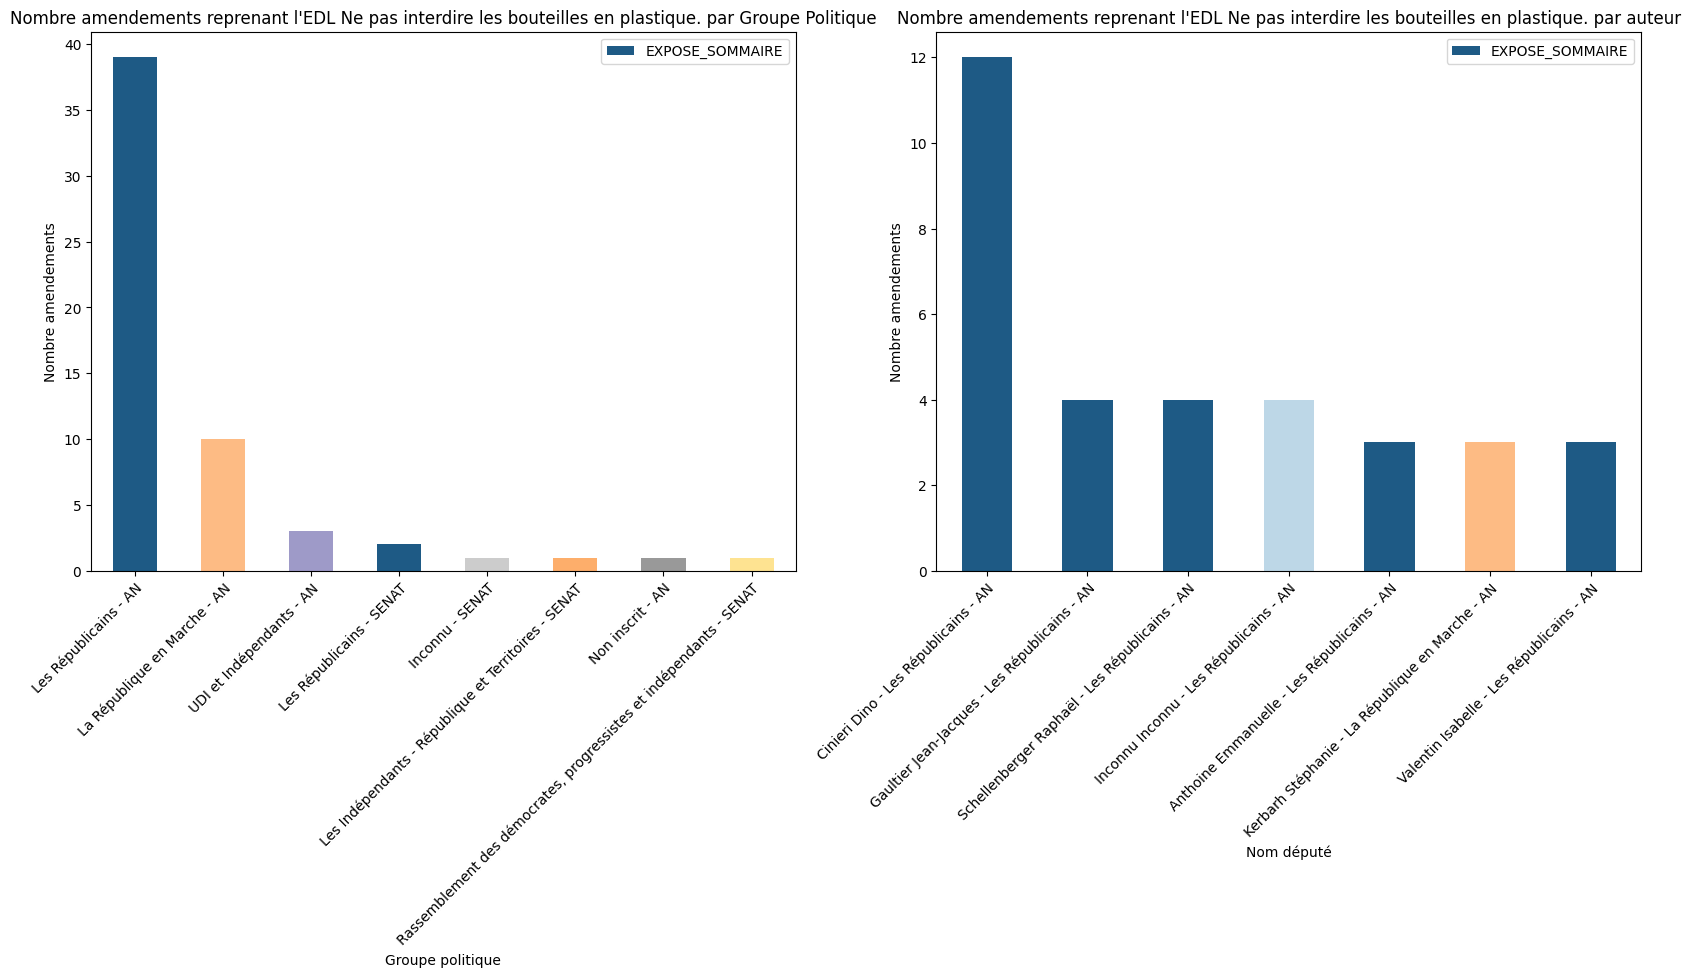

In [37]:
loi_verte_art_2 = pd.read_csv("/Users/basileroth/Desktop/Code/offseason_greenlobby/data/results/predictions/agec_art_10.csv",index_col=0).reset_index(drop=True)
ARTICLE = 10
IDEE = loi_verte_art_2.IDEES.max()
df_agec_senat = pd.read_csv("/Users/basileroth/Desktop/Code/offseason_greenlobby/data/processed/AGEC/SENAT/df_senat.csv",index_col=0)


print(f"""\nAssemblée Nationale : \n{
loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "AN") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2[loi_verte_art_2.CHAMBRE == "AN"].NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "AN") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2[loi_verte_art_2.CHAMBRE == "AN"].NOM_AMENDEMENT.nunique()}) des amendements déposés à l'AN sur l'article {ARTICLE} de la Loi AGEC reprennent l'EDL [{IDEE}].""")

print(f"""\nSénat : \n{
loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "SENAT") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2[loi_verte_art_2.CHAMBRE == "SENAT"].NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "SENAT") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2[loi_verte_art_2.CHAMBRE == "SENAT"].NOM_AMENDEMENT.nunique()}) des amendements déposés au Sénat sur l'article {ARTICLE} de la Loi AGEC reprennent l'EDL [{IDEE}].""")

print(f"""\nSénat + Assemblée Nationale : \n{
loi_verte_art_2[(loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2.NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2.NOM_AMENDEMENT.nunique()}) des amendements déposés au Sénat + AN sur l'article {ARTICLE} de la Loi AGEC reprennent l'EDL [{IDEE}].""")


df_agec_senat['new_groupe_politique'] = df_agec_senat.groupe_politique.apply(lambda x : x.replace("\n"," ").replace("  "," ") \
                                    .replace("Membre du Groupe ","")\
                                    .replace("Membre du groupe ","")\
                                    .replace("Président du groupe ","") \
                                    .replace("Présidente du groupe ","") \
                                    .replace("Apparenté au groupe ","") \
                                    .replace("Rattachée au groupe ","") \
                                    .replace("Apparentée au groupe ","") \
                                    .replace("Rattaché au groupe ","") \
                                            if len(str(x)) > 3 else "Inconnu")


for index,row in loi_verte_art_2.iterrows():
    if row["CHAMBRE"] == "SENAT":
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"groupe_politique"] = df_agec_senat.loc[df_agec_senat.auteur == row["auteur"],"new_groupe_politique"].values[0]
        
for index,row in loi_verte_art_2.iterrows():
    if row["CHAMBRE"] == "SENAT":
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"couleur"] = gp_agec_senat.get(row["groupe_politique"],"grey")["couleur"]
    else:
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"couleur"] = color_15.get(row["groupe_politique"],"grey")["couleur"]

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

df = loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].copy()
df["gp_new"] = df.groupe_politique + " - " + df["CHAMBRE"]

df = df.groupby(["gp_new"]).agg({
    "EXPOSE_SOMMAIRE" : "count",
    "couleur" : "min"
}).reset_index()

df = df.sort_values('EXPOSE_SOMMAIRE',ascending=False)

df.plot.bar(x='gp_new', y='EXPOSE_SOMMAIRE', rot=0, ax = axs[0],color=df.couleur.values)
axs[0].set_xticklabels(df.gp_new, rotation=45, ha='right', rotation_mode='anchor')
axs[0].set_title(f"Nombre amendements reprenant l'EDL {IDEE} par Groupe Politique");
axs[0].set_xlabel("Groupe politique");
axs[0].set_ylabel("Nombre amendements");

NUM_PLOT = 7
df = loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].copy()
df["auteur_new"] = df.auteur + " - " + df["groupe_politique"] + " - "+ df["CHAMBRE"] 
df = df.groupby(["auteur_new"]).agg({
    "EXPOSE_SOMMAIRE" : "count",
    "couleur" : "min"
}).reset_index()

df = df.sort_values('EXPOSE_SOMMAIRE',ascending=False).head(NUM_PLOT)

df.plot.bar(x='auteur_new', y='EXPOSE_SOMMAIRE', rot=0, ax = axs[1],color=df.couleur.values)
axs[1].set_xticklabels(df.auteur_new.head(NUM_PLOT), rotation=45, ha='right', rotation_mode='anchor')

axs[1].set_ylabel('Nombre amendements')
axs[1].set_xlabel('Nom député')
axs[1].set_title(f"Nombre amendements reprenant l'EDL {IDEE} par auteur");

In [38]:
print("Nombre de groupes politiques reprennant au moins l'EDL une fois :")
display(loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].groupby("groupe_politique").auteur.count().sort_values(ascending=False))

Nombre de groupes politiques reprennant au moins l'EDL une fois :


groupe_politique
Les Républicains                                               41
La République en Marche                                        10
UDI et Indépendants                                             3
Inconnu                                                         1
Les Indépendants - République et Territoires                    1
Non inscrit                                                     1
Rassemblement des démocrates, progressistes et indépendants     1
Name: auteur, dtype: int64

# Loi Verte


Assemblée Nationale : 
15.0 % (27/180) des amendements déposés à l'AN sur l'article 2 de la Loi Industrie Verte reprennent l'EDL [limiter les recours abusifs].

Sénat : 
27.160493827160494 % (22/81) des amendements déposés au Sénat sur l'article 2 de la Loi Industrie Verte reprennent l'EDL [limiter les recours abusifs].

Sénat + Assemblée Nationale : 
18.773946360153257 % (49/261) des amendements déposés au Sénat + AN sur l'article 2 de la Loi Industrie Verte reprennent l'EDL [limiter les recours abusifs].


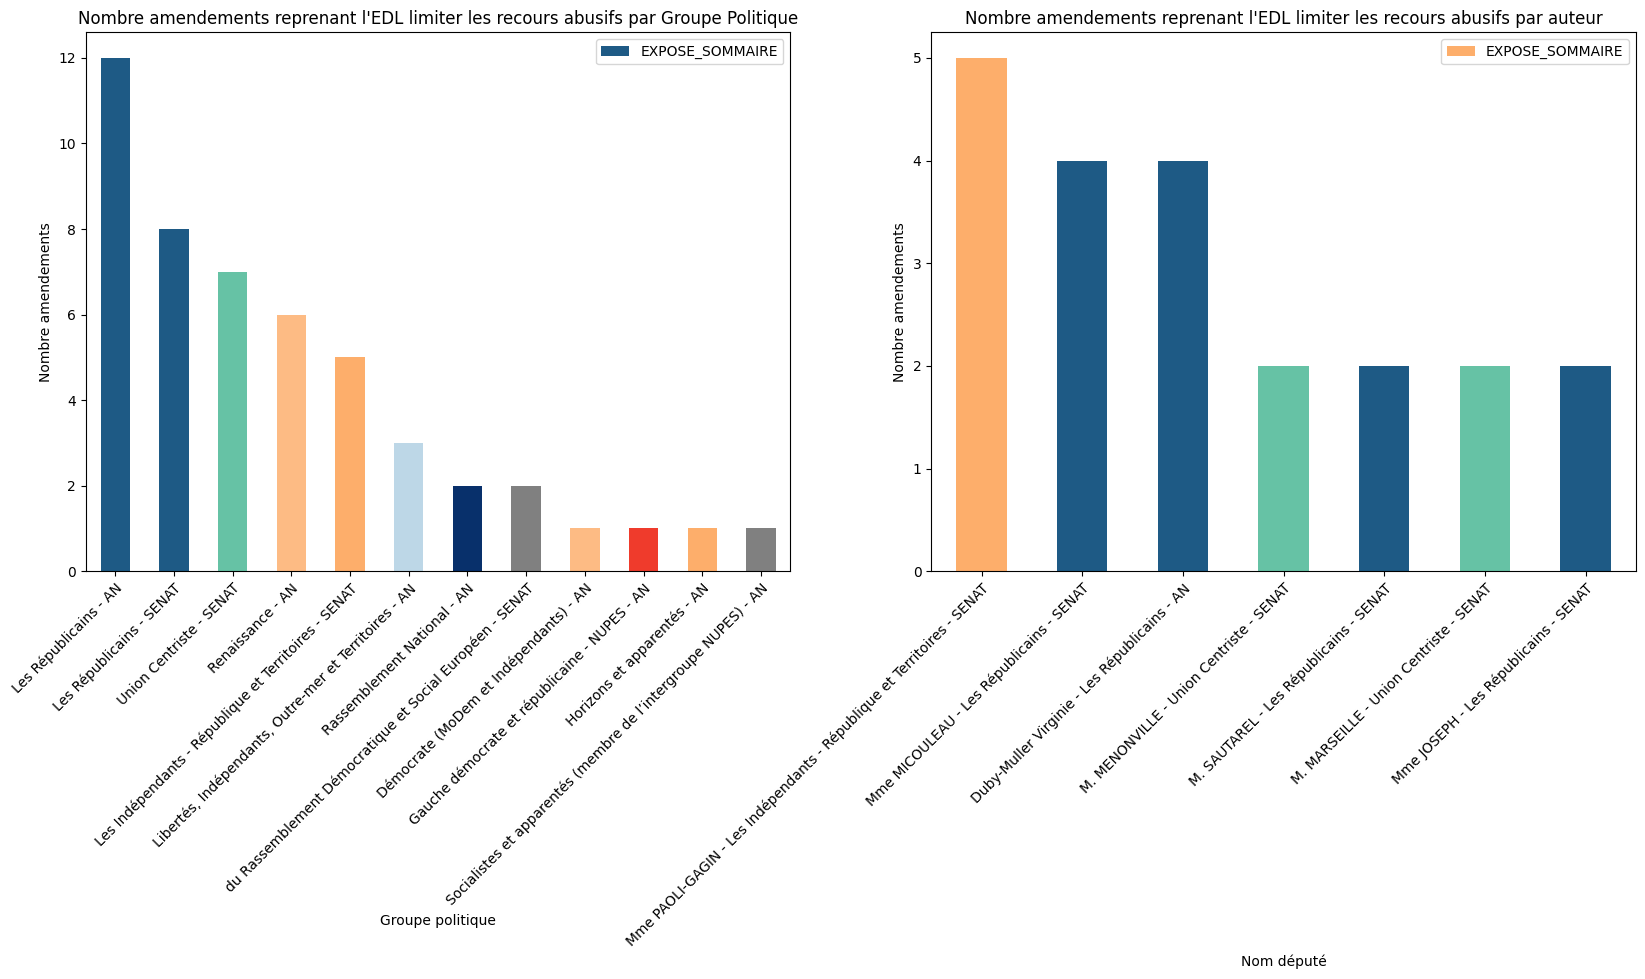

In [39]:
loi_verte_art_2 = pd.read_csv("/Users/basileroth/Desktop/Code/offseason_greenlobby/data/results/predictions/loi_verte_art_2.csv",index_col=0).reset_index(drop=True)
ARTICLE = 2
IDEE = loi_verte_art_2.IDEES.max()
df_agec_senat = pd.read_csv("/Users/basileroth/Desktop/Code/offseason_greenlobby/data/processed/LOI_VERTE/SENAT/df_senat.csv",index_col=0)


print(f"""\nAssemblée Nationale : \n{
loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "AN") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2[loi_verte_art_2.CHAMBRE == "AN"].NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "AN") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2[loi_verte_art_2.CHAMBRE == "AN"].NOM_AMENDEMENT.nunique()}) des amendements déposés à l'AN sur l'article {ARTICLE} de la Loi Industrie Verte reprennent l'EDL [{IDEE}].""")

print(f"""\nSénat : \n{
loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "SENAT") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2[loi_verte_art_2.CHAMBRE == "SENAT"].NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "SENAT") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2[loi_verte_art_2.CHAMBRE == "SENAT"].NOM_AMENDEMENT.nunique()}) des amendements déposés au Sénat sur l'article {ARTICLE} de la Loi Industrie Verte reprennent l'EDL [{IDEE}].""")

print(f"""\nSénat + Assemblée Nationale : \n{
loi_verte_art_2[(loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2.NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2.NOM_AMENDEMENT.nunique()}) des amendements déposés au Sénat + AN sur l'article {ARTICLE} de la Loi Industrie Verte reprennent l'EDL [{IDEE}].""")


df_agec_senat['new_groupe_politique'] = df_agec_senat.groupe_politique.apply(lambda x : x.replace("\n"," ").replace("  "," ") \
                                    .replace("Membre du Groupe ","")\
                                    .replace("Membre du groupe ","")\
                                    .replace("Président du groupe ","") \
                                    .replace("Présidente du groupe ","") \
                                    .replace("Apparenté au groupe ","") \
                                    .replace("Rattachée au groupe ","") \
                                    .replace("Apparentée au groupe ","") \
                                    .replace("Rattaché au groupe ","") \
                                            if len(str(x)) > 3 else "Inconnu")


for index,row in loi_verte_art_2.iterrows():
    if row["CHAMBRE"] == "SENAT":
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"groupe_politique"] = df_agec_senat.loc[df_agec_senat.auteur == row["auteur"],"new_groupe_politique"].values[0]
        
for index,row in loi_verte_art_2.iterrows():
    if row["CHAMBRE"] == "SENAT":
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"couleur"] = gp_lv_senat.get(row["groupe_politique"],{"couleur":"grey"}).get("couleur","grey")
    else:
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"couleur"] = color_16.get(row["groupe_politique"],{"couleur":"grey"}).get("couleur","grey")

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

df = loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].copy()
df["gp_new"] = df.groupe_politique + " - " + df["CHAMBRE"]

df = df.groupby(["gp_new"]).agg({
    "EXPOSE_SOMMAIRE" : "count",
    "couleur" : "min"
}).reset_index()

df = df.sort_values('EXPOSE_SOMMAIRE',ascending=False)

df.plot.bar(x='gp_new', y='EXPOSE_SOMMAIRE', rot=0, ax = axs[0],color=df.couleur.values)
axs[0].set_xticklabels(df.gp_new, rotation=45, ha='right', rotation_mode='anchor')
axs[0].set_title(f"Nombre amendements reprenant l'EDL {IDEE} par Groupe Politique");
axs[0].set_xlabel("Groupe politique");
axs[0].set_ylabel("Nombre amendements");

NUM_PLOT = 7
df = loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].copy()
df["auteur_new"] = df.auteur + " - " + df["groupe_politique"] + " - "+ df["CHAMBRE"] 
df = df.groupby(["auteur_new"]).agg({
    "EXPOSE_SOMMAIRE" : "count",
    "couleur" : "min"
}).reset_index()

df = df.sort_values('EXPOSE_SOMMAIRE',ascending=False).head(NUM_PLOT)

df.plot.bar(x='auteur_new', y='EXPOSE_SOMMAIRE', rot=0, ax = axs[1],color=df.couleur.values)
axs[1].set_xticklabels(df.auteur_new.head(NUM_PLOT), rotation=45, ha='right', rotation_mode='anchor')

axs[1].set_ylabel('Nombre amendements')
axs[1].set_xlabel('Nom député')
axs[1].set_title(f"Nombre amendements reprenant l'EDL {IDEE} par auteur");

In [40]:
print("Nombre de groupes politiques reprennant au moins l'EDL une fois :")
display(loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].groupby("groupe_politique").auteur.count().sort_values(ascending=False))

Nombre de groupes politiques reprennant au moins l'EDL une fois :


groupe_politique
Les Républicains                                             20
Union Centriste                                               7
Renaissance                                                   6
Les Indépendants - République et Territoires                  5
Libertés, Indépendants, Outre-mer et Territoires              3
Rassemblement National                                        2
du Rassemblement Démocratique et Social Européen              2
Démocrate (MoDem et Indépendants)                             1
Gauche démocrate et républicaine - NUPES                      1
Horizons et apparentés                                        1
Socialistes et apparentés (membre de l’intergroupe NUPES)     1
Name: auteur, dtype: int64

# LOA 


Assemblée Nationale : 
26.618705035971225 % (37/139) des amendements déposés à l'AN sur l'article 13 de la LOA reprennent l'EDL [droit à l'erreur des agriculteurs].

Sénat : 
6.451612903225806 % (4/62) des amendements déposés au Sénat sur l'article 13 de la LOA reprennent l'EDL [droit à l'erreur des agriculteurs].

Sénat + Assemblée Nationale : 
20.398009950248756 % (41/201) des amendements déposés au Sénat + AN sur l'article 13 de la Loi AGEC reprennent l'EDL [droit à l'erreur des agriculteurs].


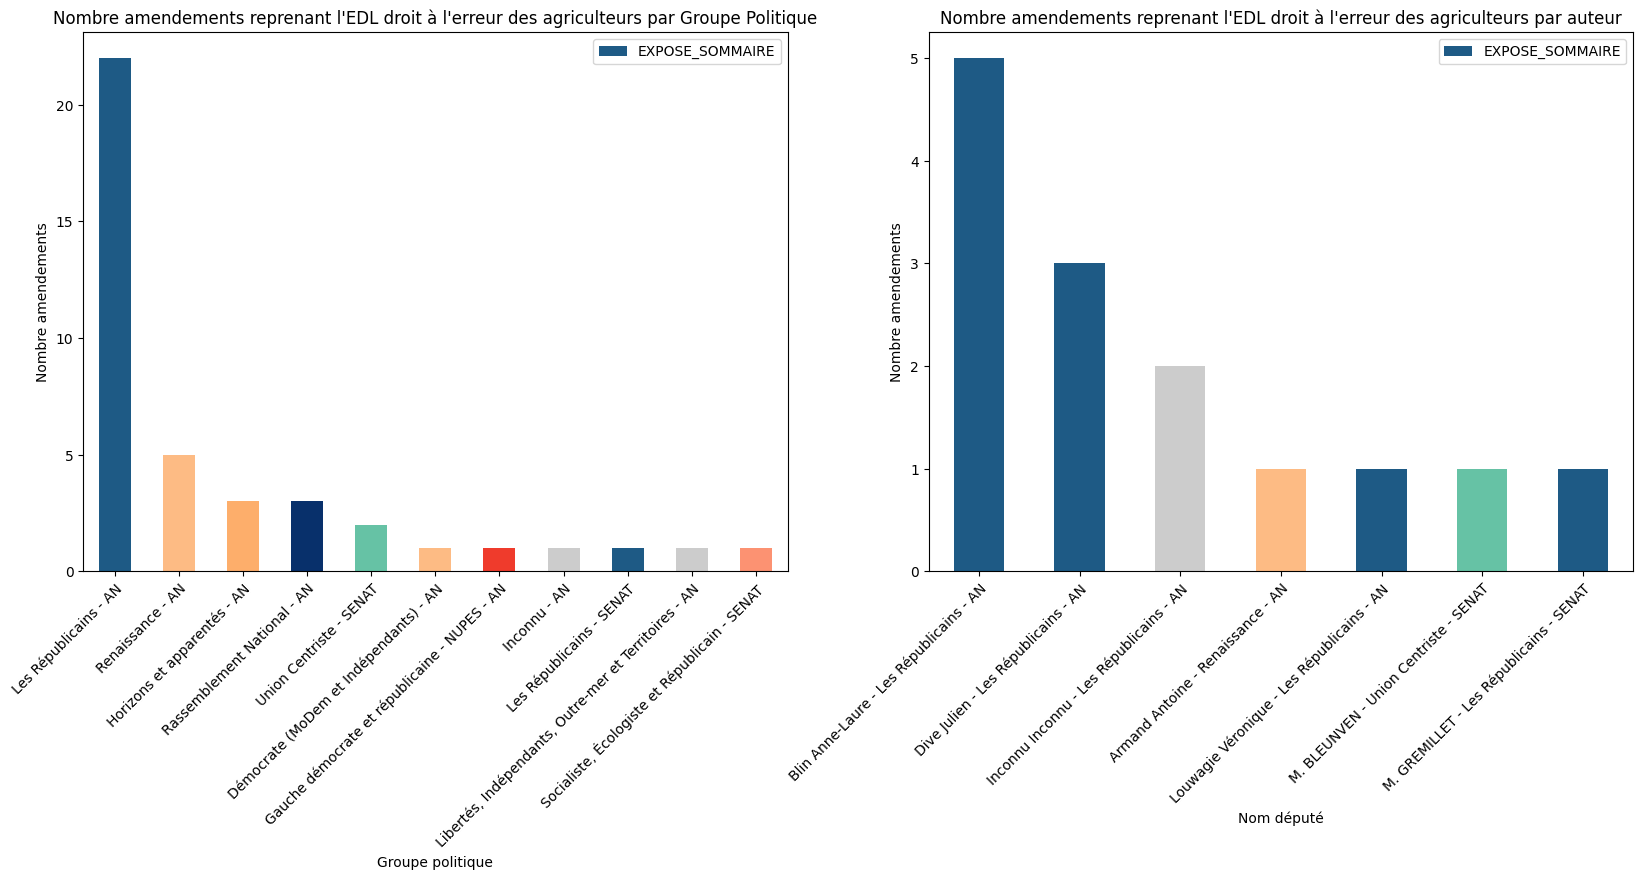

In [41]:
loi_verte_art_2 = pd.read_csv("/Users/basileroth/Desktop/Code/offseason_greenlobby/data/results/predictions/loa_art13.csv",index_col=0).reset_index(drop=True)
ARTICLE = 13
IDEE = loi_verte_art_2.IDEES.max()
df_agec_senat = pd.read_csv("/Users/basileroth/Desktop/Code/offseason_greenlobby/data/processed/LOA/SENAT/df_senat.csv",index_col=0)


print(f"""\nAssemblée Nationale : \n{
loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "AN") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2[loi_verte_art_2.CHAMBRE == "AN"].NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "AN") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2[loi_verte_art_2.CHAMBRE == "AN"].NOM_AMENDEMENT.nunique()}) des amendements déposés à l'AN sur l'article {ARTICLE} de la LOA reprennent l'EDL [{IDEE}].""")

print(f"""\nSénat : \n{
loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "SENAT") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2[loi_verte_art_2.CHAMBRE == "SENAT"].NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.CHAMBRE == "SENAT") & (loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2[loi_verte_art_2.CHAMBRE == "SENAT"].NOM_AMENDEMENT.nunique()}) des amendements déposés au Sénat sur l'article {ARTICLE} de la LOA reprennent l'EDL [{IDEE}].""")

print(f"""\nSénat + Assemblée Nationale : \n{
loi_verte_art_2[(loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique() * 100 / loi_verte_art_2.NOM_AMENDEMENT.nunique()
} % ({loi_verte_art_2[(loi_verte_art_2.prediction == "Oui")].NOM_AMENDEMENT.nunique()}/{loi_verte_art_2.NOM_AMENDEMENT.nunique()}) des amendements déposés au Sénat + AN sur l'article {ARTICLE} de la Loi AGEC reprennent l'EDL [{IDEE}].""")


df_agec_senat['new_groupe_politique'] = df_agec_senat.groupe_politique.apply(lambda x : x.replace("\n"," ").replace("  "," ") \
                                    .replace("Membre du Groupe ","")\
                                    .replace("Membre du groupe ","")\
                                    .replace("Président du groupe ","") \
                                    .replace("Présidente du groupe ","") \
                                    .replace("Apparenté au groupe ","") \
                                    .replace("Rattachée au groupe ","") \
                                    .replace("Apparentée au groupe ","") \
                                    .replace("Rattaché au groupe ","") \
                                            if len(str(x)) > 3 else "Inconnu")


for index,row in loi_verte_art_2.iterrows():
    if row["CHAMBRE"] == "SENAT":
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"groupe_politique"] = df_agec_senat.loc[df_agec_senat.auteur == row["auteur"],"new_groupe_politique"].values[0]
        
for index,row in loi_verte_art_2.iterrows():
    if row["CHAMBRE"] == "SENAT":
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"couleur"] = gp_loa_senat.get(row["groupe_politique"],{"couleur":"grey"}).get("couleur","grey")
    else:
        loi_verte_art_2.loc[loi_verte_art_2.auteur == row["auteur"],"couleur"] = color_17.get(row["groupe_politique"],{"couleur":"grey"}).get("couleur","grey")

fig, axs = plt.subplots(1, 2, figsize=(20, 7))

df = loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].copy()
df["gp_new"] = df.groupe_politique + " - " + df["CHAMBRE"]

df = df.groupby(["gp_new"]).agg({
    "EXPOSE_SOMMAIRE" : "count",
    "couleur" : "min"
}).reset_index()

df = df.sort_values('EXPOSE_SOMMAIRE',ascending=False)

df.plot.bar(x='gp_new', y='EXPOSE_SOMMAIRE', rot=0, ax = axs[0],color=df.couleur.values)
axs[0].set_xticklabels(df.gp_new, rotation=45, ha='right', rotation_mode='anchor')
axs[0].set_title(f"Nombre amendements reprenant l'EDL {IDEE} par Groupe Politique");
axs[0].set_xlabel("Groupe politique");
axs[0].set_ylabel("Nombre amendements");

NUM_PLOT = 7
df = loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].copy()
df["auteur_new"] = df.auteur + " - " + df["groupe_politique"] + " - "+ df["CHAMBRE"] 
df = df.groupby(["auteur_new"]).agg({
    "EXPOSE_SOMMAIRE" : "count",
    "couleur" : "min"
}).reset_index()

df = df.sort_values('EXPOSE_SOMMAIRE',ascending=False).head(NUM_PLOT)

df.plot.bar(x='auteur_new', y='EXPOSE_SOMMAIRE', rot=0, ax = axs[1],color=df.couleur.values)
axs[1].set_xticklabels(df.auteur_new.head(NUM_PLOT), rotation=45, ha='right', rotation_mode='anchor')

axs[1].set_ylabel('Nombre amendements')
axs[1].set_xlabel('Nom député')
axs[1].set_title(f"Nombre amendements reprenant l'EDL {IDEE} par auteur");

In [42]:
print("Nombre de groupes politiques reprennant au moins l'EDL une fois :")
display(loi_verte_art_2[loi_verte_art_2.prediction == "Oui"].groupby("groupe_politique").auteur.count().sort_values(ascending=False))

Nombre de groupes politiques reprennant au moins l'EDL une fois :


groupe_politique
Les Républicains                                    23
Renaissance                                          5
Horizons et apparentés                               3
Rassemblement National                               3
Union Centriste                                      2
Démocrate (MoDem et Indépendants)                    1
Gauche démocrate et républicaine - NUPES             1
Inconnu                                              1
Libertés, Indépendants, Outre-mer et Territoires     1
Socialiste, Écologiste et Républicain                1
Name: auteur, dtype: int64